In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Plot demography

In [4]:
N0 = 188088

In [2]:
with open("discoal_CEU.txt", "r") as dem:
    arg_ls = dem.readline().strip().split()

In [5]:
times = np.array(arg_ls[1::4], dtype=float)*4*N0
sizes = np.array(arg_ls[3::4], dtype=float)*N0

In [12]:
dem = np.vstack(([0, N0], np.vstack((times.astype(int), sizes.astype(int))).T))

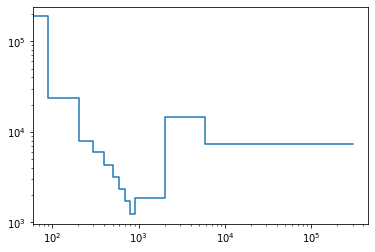

In [17]:
plt.step(dem[:, 0], dem[:, 1], where="post")
plt.xscale("log")
plt.yscale("log")

In [18]:
dem

array([[     0, 188088],
       [    90,  23382],
       [   204,   8006],
       [   300,   5930],
       [   400,   4360],
       [   500,   3205],
       [   599,   2357],
       [   699,   1733],
       [   799,   1236],
       [   920,   1860],
       [   999,   1860],
       [  1200,   1860],
       [  1500,   1863],
       [  2041,  14473],
       [  2800,  14473],
       [  3700,  14473],
       [  4699,  14462],
       [  5921,   7310],
       [  6400,   7310],
       [  6999,   7310],
       [  7799,   7310],
       [  8999,   7310],
       [ 11000,   7310],
       [ 13999,   7310],
       [ 18000,   7310],
       [ 24999,   7310],
       [ 35000,   7310],
       [ 49999,   7310],
       [100000,   7310],
       [300000,   7310]])

#### Read output

In [2]:
import sys
sys.path.append("../../DA-SIA/fea_encoding")
from utils import *

In [3]:
from Bio import Phylo
from io import StringIO

In [27]:
soft_flag = False
SAF = 0
cat = 'neu'
c_low, c_high = [0.1, 0.9]
with open("/grid/siepel/home_norepl/mo/dom_adapt/1000GCEU_reanalysis/sample16.discoal", "r") as discoalF:
    read_GT = False
    seek_onset = False # seek sweep onset
    onset_gen = -1
    for line in discoalF:
        if line[:8] == "segsites":
            segsites = int(line.strip().split()[1])
            gtm = np.empty((0, segsites), dtype=np.int8)
            continue
        if line[:9] == "positions":
            var_pos = np.array(line.strip().split()[1:], dtype=float)
            read_GT = True
            continue
        if line[:4] == "Freq":
            seek_onset = True
            continue
        if seek_onset:
            gbp_der_anc = line.strip().split()
            if len(gbp_der_anc) == 3:
                onset_gen = float(gbp_der_anc[0]) # in coalc. unit
                if soft_flag and float(gbp_der_anc[1]) < SAF: # 1st time point going backward
                    seek_onset = False
            elif onset_gen != -1:
                seek_onset = False
            continue
        if read_GT:
            gtm = np.vstack((gtm, np.fromstring(line.strip(), dtype=np.int8) - ord("0")))

gtm = np.transpose(gtm)
if cat == 'neu':
    samp_idx = samp_var(gtm, var_pos, c_low, c_high, 0.1, 0.9) # IMPORTANT: match fea extraction window!
    foc_var_pos = var_pos[samp_idx]
    #foc_var_gt = gtm[samp_idx]
    CAF = np.mean(gtm[samp_idx])

elif cat == 'swp':
    foc_var_pos = 0.5
    #foc_var_gt = gtm[var_pos == 0.5].flatten()

#feaMtx = inf_fea(var_pos, gtm, foc_var_gt, foc_var_pos, str(2*10000), "2.5e-8", 1.25)

/tmp/ipykernel_151634/1191235292.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gtm = np.vstack((gtm, np.fromstring(line.strip(), dtype=np.int8) - ord("0")))


In [28]:
vOI_gt = gtm[var_pos == foc_var_pos].flatten()

In [29]:
vOI_gt

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int8)

In [30]:
tar_pos = 10000*foc_var_pos
left = 0

with open("/grid/siepel/home_norepl/mo/dom_adapt/1000GCEU_reanalysis/sample16.discoal", "r") as discoalF:

    for line in discoalF:
        if line[0] == "[":
            intvl, nwk_str = line.strip().split("]")
            intvl = int(intvl[1:])
            if left + intvl > tar_pos: # not sure if 0- or 1- based coordinates
                break
            left += intvl

In [31]:
list(map(str, np.nonzero(vOI_gt)[0]))

['3', '4', '6', '8', '9', '11', '14', '15']

In [32]:
tr = Phylo.read(StringIO(nwk_str), "newick")

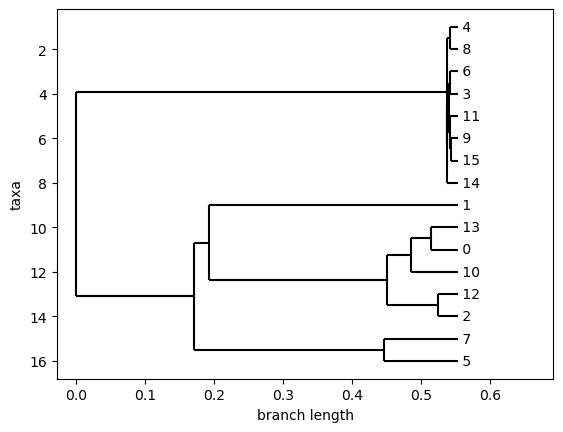

In [33]:
Phylo.draw(tr)

In [34]:
F, W, R = encode(nwk_str, 16, list(map(str, np.nonzero(vOI_gt)[0])))

In [35]:
F

array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  2,  4,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  2,  4,  5,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  2,  4,  5,  6,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  2,  4,  4,  5,  7,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  3,  4,  6,  8, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  3,  4,  6,  8,  9, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  3,  4,  6,  8,  9, 10, 12,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  3,  4,  6,  8,  9, 10, 11, 13,  0,  0,  0],
       [ 0,  0,  1,  3,  3,  4,  6,  8,  9, 10, 10, 12, 14,  0,  0],
       [ 0,  0,  1,  3,  3,  4,  6,  8,  8,  9,  9, 11, 13, 15,  0],
       [ 0,  0,  1,  3,  3,  4,  6

In [36]:
R

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 4, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 5, 7, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 4, 6, 8]])

In [40]:
(W*4*10000).astype(int)

array([[ 6806,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [ 7675,   868,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [17822, 11016, 10147,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [17996, 11190, 10321,   173,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [19412, 12605, 11737,  1589,  1415,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [20586, 13779, 12911,  2763,  2589,  1173,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [20966, 14160, 13291,  3144,  2970,  1554,   380,     0,     0,
            0,     0,     0,     0,     0,     0],
       [21481, 14675, 13806,  3659,  3485,  2069,   895,   515,     0,
            0,     0,     0,     0,     0,     0],
       [21514, 14707, 13

#### Check trial run

In [17]:
with np.load("/grid/siepel/home_norepl/mo/dom_adapt/1000GCEU_reanalysis/discoal_out/discoal_TRIAL2neu_1128_198_neu_60.npz") as npzF:
    print(list(npzF.keys()))
    SC = npzF["SC"]
    SAF = npzF["SAF"]
    CAF = npzF["CAF"]
    onset = npzF["onset"]
    foc_var_pos = npzF["foc_var_pos"]
    site_cnt = npzF["site_cnt"]
    fea = npzF["fea"]

['SC', 'SAF', 'CAF', 'onset', 'foc_var_pos', 'site_cnt', 'fea']


In [19]:
fea[23]

array([[[    2,     0,     0, ...,     0,     0,     0],
        [    1,     3,     0, ...,     0,     0,     0],
        [    1,     2,     4, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,   196,     0,     0],
        [    0,     0,     0, ...,   195,   197,     0],
        [    0,     0,     0, ...,   194,   196,   198]],

       [[ 5041,     0,     0, ...,     0,     0,     0],
        [15123, 10081,     0, ...,     0,     0,     0],
        [18083, 13042,  2960, ...,     0,     0,     0],
        ...,
        [20758, 15716,  5635, ...,    30,     0,     0],
        [20765, 15724,  5642, ...,    37,     7,     0],
        [20818, 15776,  5695, ...,    90,    60,    52]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,    27,     0,     0],
        [    0,     0,     0, ...,    27,    